<a href="https://colab.research.google.com/github/AntonnyMendonca/cross_validation-breast_cancer/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.datasets import load_breast_cancer
%matplotlib inline

# Lendo dataset

In [ ]:
breast = load_breast_cancer()

In [ ]:
breast_data = breast.data
breast_labels = breast.target

In [ ]:
labels = np.reshape(breast_labels, (569, 1))

In [ ]:
final = np.concatenate([breast_data, labels], axis=1)

# Criando um df com o dataset inteiro

In [ ]:
colunas = list(breast.feature_names) # convertendo os nomes das features em lista
colunas.append('labels')

df = pd.DataFrame(final, columns=colunas)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


# Criando um DF para entender melhor os dados

In [ ]:
unicos = []
for colunas in df:
  unicos.append(len(np.unique(df[colunas])))

In [ ]:
informacoes = {
    'variaveis':df.columns,
    'tipos':np.array(df.dtypes),
    'nulos':np.array(df.isnull().sum()),
    'unicos':np.array(unicos)
}
pd.DataFrame(informacoes)

,variaveis,tipos,nulos,unicos
0,mean radius,float64,0,456
1,mean texture,float64,0,479
2,mean perimeter,float64,0,522
3,mean area,float64,0,539
4,mean smoothness,float64,0,474
5,mean compactness,float64,0,537
6,mean concavity,float64,0,537
7,mean concave points,float64,0,542
8,mean symmetry,float64,0,432
9,mean fractal dimension,float64,0,499


# Padronizando os dados

In [ ]:
st = StandardScaler()
x_scaled = st.fit_transform(df.iloc[:,:-1])

df_ = pd.DataFrame(x_scaled, columns=list(breast.feature_names))

# Realizando a redução de dimensionalidade (PCA)
Essa função recebe dois parâmetros:
- lista (cada item da lista deve conter um inteiro que representa a quantidade de dimensões para o respectivo modelo)
- df (data frame de referência)

A função retorna o accuracy de cada modelo mas a forma de avaliação pode ser mudada no hiperparâmetro 'scoring' de cada modelo.

In [ ]:
def reduzirDimensoes(lista_comps, dataframe, score_type):
  score_modelos = []
  for n_comp in lista_comps:
    pca = PCA(n_components=n_comp) # Quantas dimensões nós queremos
    pca_breast = pca.fit_transform(dataframe)

    X = pca_breast
    y = df['labels']

    logistica = cross_val_score(LogisticRegression(), X, y, scoring = score_type)
    arvore = cross_val_score(DecisionTreeClassifier(), X, y, scoring = score_type)
    forest = cross_val_score(RandomForestClassifier(), X, y, scoring = score_type)
    knn = cross_val_score(KNeighborsClassifier(), X, y, scoring = score_type)
    xBoost = cross_val_score(XGBClassifier(), X, y, scoring = score_type)

    temporaria = []
    temporaria.append(n_comp)
    temporaria.append(logistica.mean())
    temporaria.append(arvore.mean())
    temporaria.append(forest.mean())
    temporaria.append(knn.mean())
    temporaria.append(xBoost.mean())
    
    score_modelos.append(temporaria)
    
  return score_modelos

# cross_validation
Os modelos estão sendo criados com o [cross_validation](https://scikit-learn.org/stable/modules/cross_validation.html), esse algoritmo não necessita de [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) pois ele já realiza isso implicitamente conforme a imagem abaixo.

O **test data** cria uma lista com os resultados de cada split, o que a função *reduzirDimensoes()* faz é retornar a média dessa lista para cada modelo criado

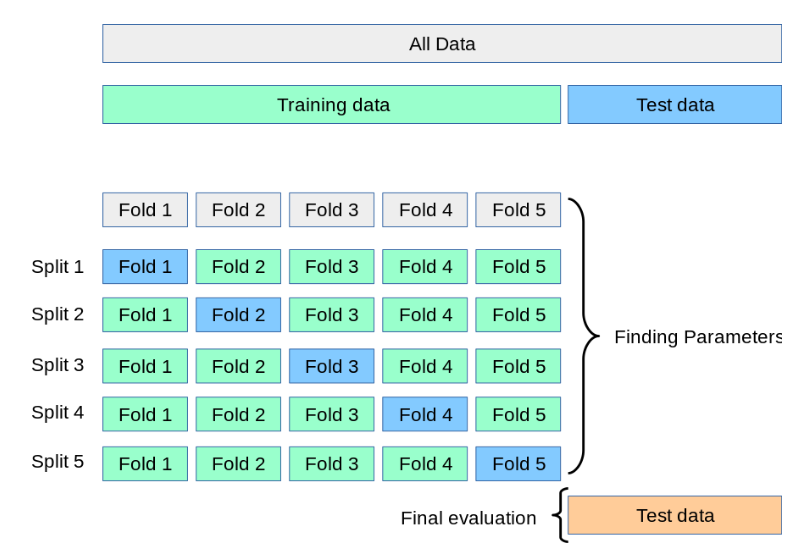

# Criando modelos
- **listaDimensoes** cada item contém o número de dimensões para um modelo que será criado na função acima
-**accNDimensoes** passa a lista, dataframe e o metodo de avaliação da sua escolha

In [ ]:
listaDimensoes = [1, 2, 6, 7, 8, 9, 20]
accNDimensoes = reduzirDimensoes(listaDimensoes, df_, 'accuracy')

# Comparando modelos
- No ***dataframe*** abaixo é possível ver o **accuracy** de cada modelo, lembrado que os modelos foram criados com as dimensões já reduzidas (PCA).

In [ ]:
colunas = ['Componentes', 'Logistica', 'Arvore', 'RandomForest','KNN','xBoost']
scores = pd.DataFrame(accNDimensoes, columns=colunas)
scores.set_index(colunas)
scores.index.name=None
scores.style.applymap(lambda x: 'background-color: lightgreen' if x >= 0.95 else ('background-color: yellow' if x >= 0.90 else ''))

,Componentes,Logistica,Arvore,RandomForest,KNN,xBoost
0,1,0.912156,0.873451,0.873451,0.898075,0.906909
1,2,0.952601,0.924437,0.936749,0.940258,0.933225
2,6,0.971899,0.933163,0.950769,0.961310,0.959618
3,7,0.971899,0.924375,0.949030,0.963080,0.956094
4,8,0.977162,0.922621,0.943720,0.963065,0.959587
5,9,0.980671,0.915572,0.947244,0.963065,0.954324
6,20,0.977177,0.919081,0.929685,0.964850,0.949045
